In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
df=pd.read_csv('/Users/kritisharma/100 days ml/day24/Social_Network_Ads.csv')

In [118]:
df=df.iloc[:,2:]

In [119]:
df.sample(5)

,Age,EstimatedSalary,Purchased
26,49,28000,1
280,59,88000,1
363,42,79000,0
281,35,61000,0
144,34,25000,0


Train test split

In [120]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and 'Purchased' is the column you want to predict
X = df.drop('Purchased', axis=1)
y = df['Purchased']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Displaying the shapes of the train and test sets
print(X_train.shape, X_test.shape)

(280, 2) (120, 2)


StandardScaler

In [121]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#fit the scaler to the train set, it will Learn the parameters
scaler.fit(X_train)
#transform train and test sets
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [122]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [123]:
# X_train_scaled


In [124]:
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled= pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [125]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [126]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [127]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [128]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [129]:
np.round(X_train_scaled.describe(),1)


,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


Text(0.5, 1.0, 'After Scaling')

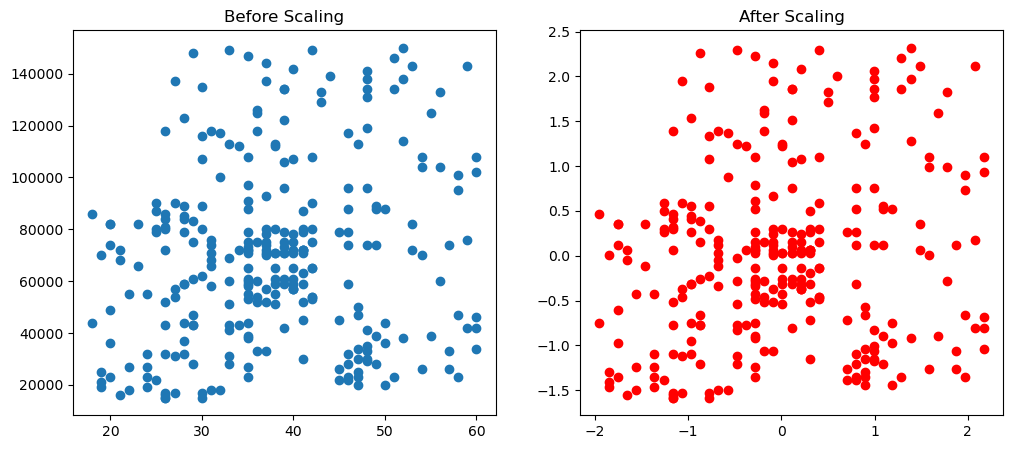

In [130]:
fig, (ax1,ax2)=plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")

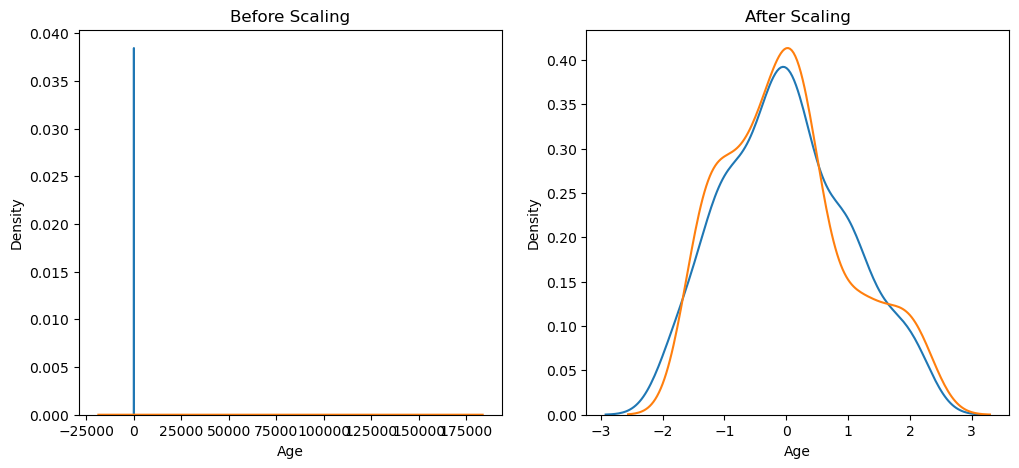

In [131]:
fig, (ax1,ax2)=plt.subplots(ncols=2, figsize=(12,5))
#before scaling

ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

#after scaling

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

Comparision Distributions

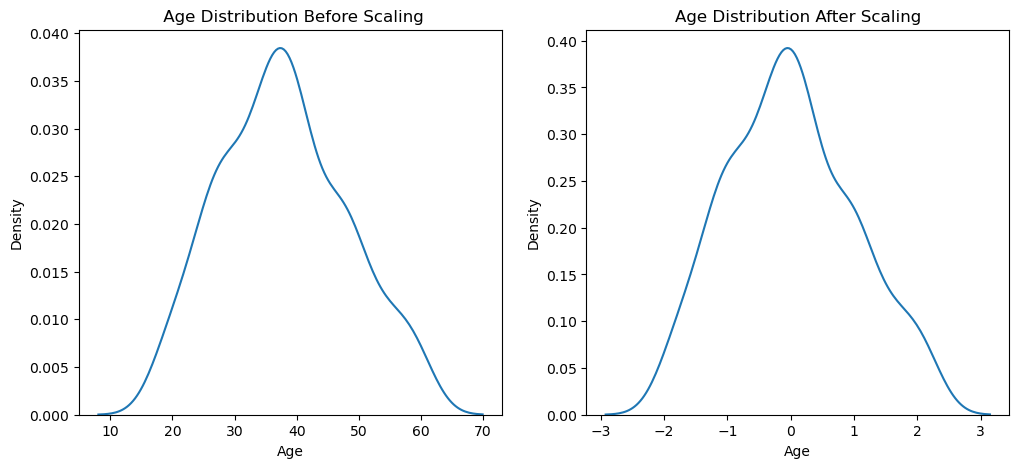

In [132]:
fig, (ax1,ax2)=plt.subplots(ncols=2, figsize=(12,5))
#before scaling

ax1.set_title(" Age Distribution Before Scaling")
sns.kdeplot(X_train['Age'],ax=ax1)


#after scaling

ax2.set_title("Age Distribution After Scaling")
sns.kdeplot(X_train_scaled['Age'],ax=ax2)

plt.show()

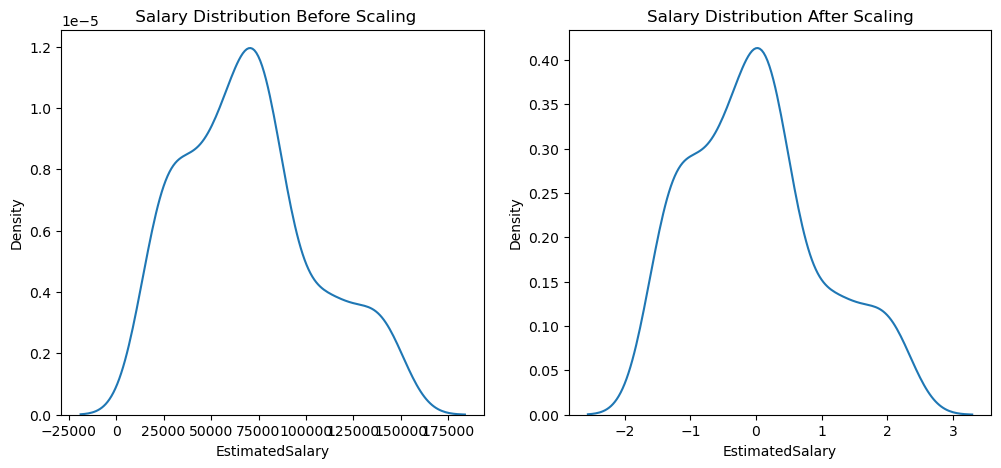

In [133]:
fig, (ax1,ax2)=plt.subplots(ncols=2, figsize=(12,5))
#before scaling

ax1.set_title(" Salary Distribution Before Scaling")
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)


#after scaling

ax2.set_title("Salary Distribution After Scaling")
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)

plt.show()

Why scaling is important

In [134]:
from sklearn.linear_model import LogisticRegression

In [135]:
lr=LogisticRegression()
lr_scaled= LogisticRegression()

In [136]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [137]:
y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [138]:
from sklearn.metrics import accuracy_score

In [139]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [140]:
from sklearn.tree import DecisionTreeClassifier

In [141]:
dt=DecisionTreeClassifier()
dt_scaled=DecisionTreeClassifier()

In [142]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [143]:
y_pred=dt.predict(X_test)
y_pred_scaled=dt_scaled.predict(X_test_scaled)

In [144]:
print("Actual",accuracy_score(y_test,y_pred))
print("scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
scaled 0.8666666666666667


In [145]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


Effect of Outlier


In [146]:
new_data = pd.DataFrame({
    'Age': [5, 90, 95],
    'EstimatedSalary': [1000, 250000, 350000],
    'Purchased': [0, 1, 1]
})
df = pd.concat([df, new_data], ignore_index=True)



In [147]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


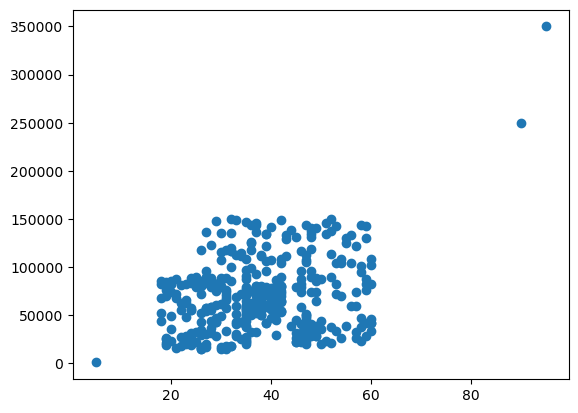

In [148]:
plt.scatter(df['Age'],df['EstimatedSalary'])

In [149]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and 'Purchased' is the column you want to predict
X = df.drop('Purchased', axis=1)
y = df['Purchased']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Displaying the shapes of the train and test sets
print(X_train.shape, X_test.shape)

(282, 2) (121, 2)


In [150]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#fit the scaler to the train set, it will Learn the parameters
scaler.fit(X_train)
#transform train and test sets
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [151]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

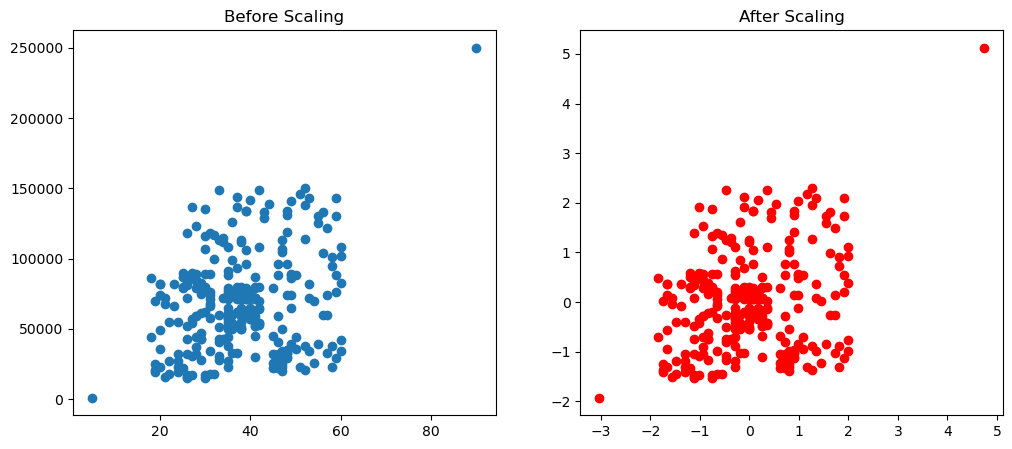

In [152]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()